In [20]:
#@title Librerias

import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.integrate import quad, trapezoid, simpson, tplquad, fixed_quad # Integracón
from scipy.interpolate import CubicSpline, interp1d, lagrange, CubicHermiteSpline # Interpolación
from scipy.optimize import fsolve, root_scalar, newton # Raíces
from scipy.stats import linregress # Regresión
import sympy as sp # Simbólica

# Parcial I - Métodos Computacionales
**2024-2**

---

*Nombre:*

*Identificación:*

---
* Sea honest@
* El uso de herramientas de IA no está permitido
* Puede consultar la documentación de las librerias.
* Sea ordendado dando la solución a cada punto.
* *Asegurese que el notebook corra completamente*
* Suba su notebook al GitHub del curso y recuerde hacer pull-request

# 1

**(40 puntos)** La velocidad del agua $v$ [m/s] en la descarga de un tanque cilindrico a través de un tubo largo (como se muestra en la figura) se puede calcular como:

$$
v = \sqrt{2gH}\tanh{\left(\frac{\sqrt{2gH}}{2L}t\right)}
$$



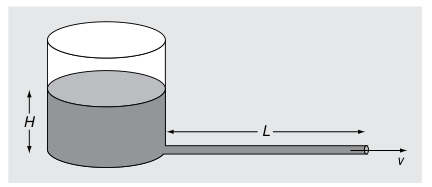

donde $g$ = 9.81 m/s$^2$, H es la carga hidrostática inicial (m), L la longitud del tubo (m) y $t$ el tiempo transcurrido (s).

*a)* Escriba una función explicita para encontrar la velocidad de descarga en función de las variables asociadas.

*b)* Realice un gráfico de $v(H)$ para $0\leq H\leq 5$, con $L = 4$ m y para $t = 2.5$ s

*c)* Suponga que quiere conocer la carga hidrostática necesaria para tener una velocidad de 5 m/s transcurridos 2.5 s. Identifique gráficamente este valor.

*d)* Realice una función que encuentre la raiz usando el método de bisección con una tolerancia de 1e-7, para esto puede modificar el siguiente pseudo-código:


```python
MÉTODO BISECCIÓN(f, a, b, tol)
    MIENTRAS (b - a)/2 > tol HACER
        c = (a + b)/2
        
        SI f(c) = 0 ENTONCES
            RETORNAR c
        
        SI f(a)*f(c) < 0 ENTONCES
            b = c
        SINO
            a = c
        FIN SI
    FIN MIENTRAS
    
    RETORNAR (a + b)/2
FIN MÉTODO
```

*e)* Usando el método de `scipy.newton` encuentre el valor de la raiz

```python
# Método de Newton
root = newton(f, x0, fprime)  # fprime es la derivada
```

Compare sus respuestas con el numeral anterior y obtenga el error relativo.


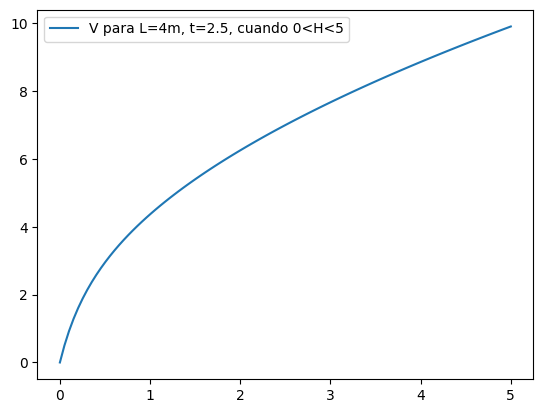

In [3]:
g = 9.81
v = lambda H,L, t: np.sqrt(2*g*H)*np.tanh(np.sqrt((2*g*H)*t/(2*L)))
#Hacemos el grafico con los parametros dados:
domain_h = np.linspace(0,5,100)
plt.plot(domain_h,v(domain_h, 4, 2.5), label='V para L=4m, t=2.5, cuando 0<H<5')
plt.legend()

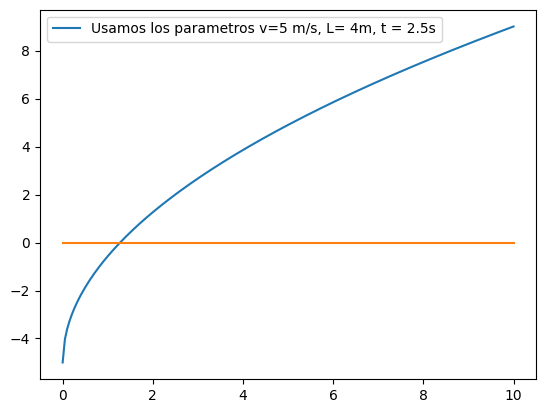

In [4]:
H = sp.symbols("H")
domain_h2 = np.linspace(0 , 10, 200)

v_sim = sp.sqrt(2*g*H)*sp.tanh(sp.sqrt((2*g*H)*2.5/2*4))- 5

plt.plot(domain_h2, [v_sim.subs(H, x) for x in domain_h2], label='Usamos los parametros v=5 m/s, L= 4m, t = 2.5s')
plt.plot(domain_h2, [0 * x for x in domain_h2])
plt.legend()
#sp.solve(v_sim)

In [5]:
f = lambda H: np.sqrt(2*g*H)*np.tanh(np.sqrt((2*g*H)*2.5/(2*4)))-5
def bis(f, a ,b, tol):
  while (b-a)/2 > tol:
    c = (a+b)/2
    if f(c) ==0 :
      return c
    if f(a)*f(c) < 0:
      b = c
    else:
      a = c
    return (a+b)/2
bis(f, 0, 10, 1e-7)

2.5

-0.9340495391097844

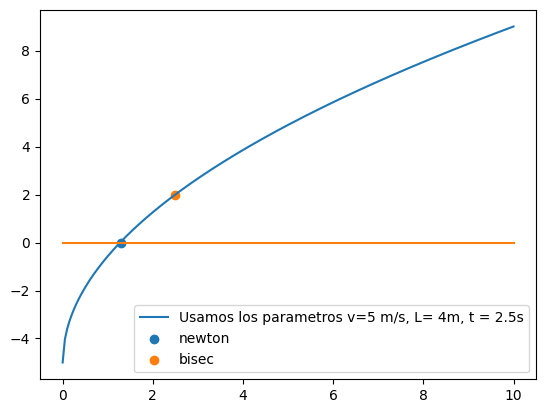

In [6]:
#newton?
root = newton(f, 1.7)
plt.plot(domain_h2, [v_sim.subs(H, x) for x in domain_h2], label='Usamos los parametros v=5 m/s, L= 4m, t = 2.5s')
plt.plot(domain_h2, [0 * x for x in domain_h2])
plt.scatter(root,f(root),label = 'newton')
plt.scatter(2.5, f(2.5), label= 'bisec')
plt.legend()
(root-2.5 )/root
#El error relativo es de 0.9340495391097844 que viene de restar la raìz con el metodo de newton
#y la raìz con el metodo de biseccion

# 2

**(30 puntos)** Usualmente algunas reacciones quimicas siguen el siguiente modelo:

$$
\frac{dc}{dt} = -kc^n
$$

donde $c$ es la concentración, $t$ el tiempo, $k$ la tasa de la reacción y $n$ su orden. Usando los siguientes datos:



```python
# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([3.52, 2.48, 1.75, 1.23, 0.87, 0.61])
```


*a)* Conociendo que el método de diferencias finitas se puede escribir como:

###  Diferencias finitas hacia adelante:
Aproximación de primer orden:
$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_i)}{h}
$$

### Diferencias finitas hacia atrás:
Aproximación de primer orden:
$$
f'(x_i) \approx \frac{f(x_i) - f(x_{i-1})}{h}
$$

### Diferencias finitas centradas:
Aproximación de segundo orden:
$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_{i-1})}{2h}
$$

Escribe una función explicita que calcule $dc/dt$ usando el método de diferencias finitas a partir de los valores de $c$ y $t$, luego grafique en función de t. *Ayuda: No es necesario interpolar*

*b)* Compare el resultado anterior con `numpy.gradient`, se acercan?

*c)* Linealice la ecuación inicial (para esto puede usar log) y encuentre los valores correspondientes a $k$ y $n$



```python
# Realizar el ajuste lineal
slope, intercept, r_value, p_value, std_err = linregress(x, y)
```

*d)* Finalmente, usando los valores de $k$ y $n$ grafique $dc/dt$ y compare con los datos de la tabla. ¿Se comportan igual, determine el error máximo?




In [7]:
t_a = np.array([10, 20, 30, 40, 50, 60])
c_a = np.array([3.52, 2.48, 1.75, 1.23, 0.87, 0.61])
def dif(c_a):
  c_f = []
  for i in range(len(c_a)):
    if i == 0:
      c_f.append((c_a[i+1] - c_a[i])/10)
    elif i == len(c_a)-1:
      c_f.append((c_a[i] - c_a[i-1])/10)
    else:
      c_f.append((c_a[i+1]-c_a[i-1])/20)
  return c_f
B = dif(c_a)

gra = np.gradient(c_a, t_a)

gra - B
#Son indenticos se aprecia que sus diferencia es cero

array([0., 0., 0., 0., 0., 0.])

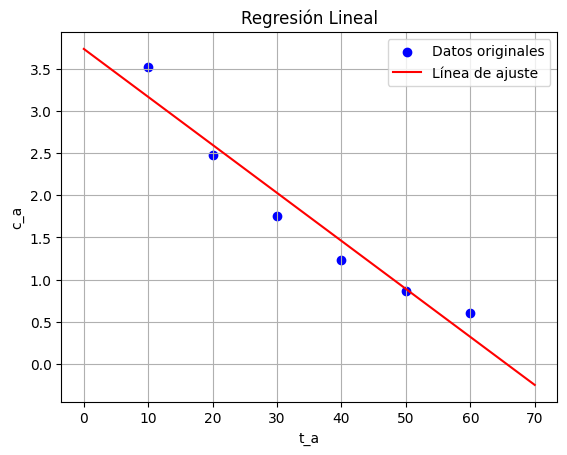

In [8]:

line = slope, intercept, r_value, p_value, std_err = linregress(t_a, c_a)
t= np.linspace(0,70,100)
lin = lambda x: slope*x + intercept
plt.scatter(t_a, c_a, color="blue", label="Datos originales")
plt.plot(t, lin(t), color="red", label="Línea de ajuste")
plt.xlabel("t_a")
plt.ylabel("c_a")
plt.title("Regresión Lineal")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# No se parecen mucho a la forma de los datos originales pero se comportan de manera decreciente
#Medianamente lineal, aunque podría decirse que para t=60 se empieza a estabilizar

In [14]:
errores_individuales = np.abs(c_a - lin(t_a))
error_maximo = np.max(errores_individuales)
error_maximo
#error maximo

0.35523809523809513

In [10]:
std_err

0.007097762414487882

# 3
**(30 puntos)** Considere los  datos de concentración del punto anterior

```python
# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([5.29, 6.24, 7.02, 7.68, 8.25, 8.77])
```

*a)* Realice un gráfico de $c(t)$

*b)* Usando la interpolación de `scipy.interpolate.lagrange` y de `scipy.interpolate.CubicHermiteSpline` obtenga el polinomio interpolador de lagrange llamado `poly_lagrange` y de Hermite `poly_Hermite` para los datos datos.

*c)* Conociendo que `scipy.interpolate.lagrange` devuelve un array tipo Polynomial, use la siguiente rutina para encontrar la derivada:

``` python
from numpy.polynomial.polynomial import Polynomial

# Convertir a un objeto Polynomial para facilitar la derivación
poly_coef = Polynomial(poly_lagrange.coef[::-1])  # Convertimos los coeficientes
derivative = poly_coef.deriv()  # Calculamos la derivada
```

Luego, grafique $dc/dt$ en función del tiempo $t$ y compare con la función
$$
\frac{dc}{dt} = -kc^n
$$

con $k = 3$ y $n = -2$

*d)* Realice un gráfico del error absoluto




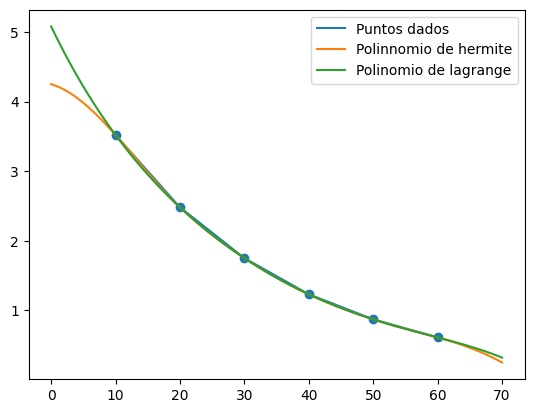

In [51]:
domain = np.linspace(0,70, 100)
poly_lagrange = lagrange(t_a, c_a)
ply_Hermite = CubicHermiteSpline(t_a, c_a, gra)










plt.plot(t_a, c_a, label='Puntos dados ')
plt.plot(domain, ply_Hermite(domain), label='Polinnomio de hermite')
plt.plot(domain, poly_lagrange(domain), label='Polinomio de lagrange')
plt.scatter(t_a, c_a)
plt.legend()
plt.show()



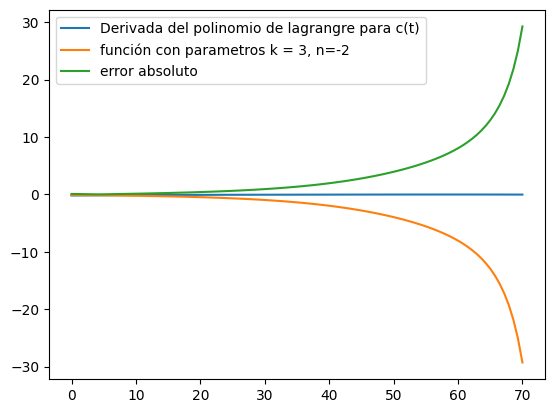

In [59]:
from numpy.polynomial.polynomial import Polynomial
y_prime = lambda c: -3*(c**-2)
# Convertir a un objeto Polynomial para facilitar la derivación
poly_coef = Polynomial(poly_lagrange.coef[::-1])  # Convertimos los coeficientes
derivative = poly_coef.deriv()  # Calculamos la derivada
plt.plot(domain, derivative(domain), label='Derivada del polinomio de lagrangre para c(t)')
plt.plot(domain, y_prime(poly_lagrange(domain)), label='función con parametros k = 3, n=-2' )
plt.plot(domain, error_abs, label='error absoluto')
plt.legend()
plt.show()
#Estamos usando la derivada hallada


In [57]:
error_abs  = np.abs(derivative(domain) - y_prime(poly_lagrange(domain)) )
